In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
excel="nba_Player data.csv"
dataframe=pd.read_csv(excel)
## Categorical values preprocessing -> position attribute
a=dataframe.iloc[:,1]
le=LabelEncoder()



In [258]:
x=dataframe.iloc[:,:-1].values
y=dataframe.iloc[:,-1].values
#preprocessing null values
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(x[:,4:8])
x[:,4:8]=imputer.transform(x[:,4:8])

In [259]:
dataframe=pd.DataFrame(x,columns=["Player","Position","Age","Games","Minutes Played","True Shooting(%)","Threepoint Attempt rate","Free throw attempt rate"])

In [260]:
b=le.fit_transform(a)
df1=pd.DataFrame({"Position":b})
dataframe.update(df1)

In [261]:
dataframe.isnull().sum()
#dataframe has no null values and categorical values

Player                     0
Position                   0
Age                        0
Games                      0
Minutes Played             0
True Shooting(%)           0
Threepoint Attempt rate    0
Free throw attempt rate    0
dtype: int64

In [262]:
dataframe=dataframe.drop(["Player"],axis=1)
#player name has nothing to do with efficiency

In [263]:

dataframe.describe()


,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate
count,497,497,497,497.0,497.0,497.0,497.0
unique,9,19,30,384.0,252.0,327.0,277.0
top,8,22,27,27.0,0.0,0.0,0.0
freq,122,53,39,4.0,9.0,30.0,32.0


In [292]:
from sklearn.model_selection import train_test_split
#independent variable
x=dataframe.iloc[:,:-1].values
#dependent variable
y=dataframe.iloc[:,-1].values

    



In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [294]:
from sklearn.linear_model import LinearRegression

In [295]:
lm=LinearRegression()

In [296]:
lm.fit(x_train,y_train)

LinearRegression()

In [297]:
y_pred=lm.predict(x_test)
y_pred


array([ 0.22800823,  0.10709378,  0.33676521,  0.17756667,  0.25539951,
        0.38280518,  0.14245398,  0.24088966,  0.31843853,  0.31728223,
        0.53177711,  0.36608875,  0.30876367,  0.18639958,  0.18173808,
        0.24185317,  0.26153234,  0.21718619,  0.14042235,  0.18221774,
        0.28199933,  0.22720047,  0.21079391,  0.19295226,  0.4920931 ,
        0.30201828,  0.18150915,  0.27106451,  0.12042075,  0.22411614,
        0.19862325,  0.14063157,  0.3906721 ,  0.29304293,  0.42248654,
        0.13281865,  0.35237586,  0.06294966,  0.56992186,  0.44668949,
        0.29251091,  0.36142837,  0.35213937,  0.2597398 ,  0.13170844,
        0.19862425, -0.00113853,  0.17462433,  0.13471457,  0.17576862,
        0.16507551,  0.29584203,  0.1852515 ,  0.06946408,  0.30075658,
        0.26438486,  0.10956233,  0.18174984,  0.17990929,  0.29340258,
        0.20018132,  0.40446427,  0.20211606,  0.347804  ,  0.17973421,
        0.27861796,  0.49286959,  0.19134998,  0.29216671,  0.49

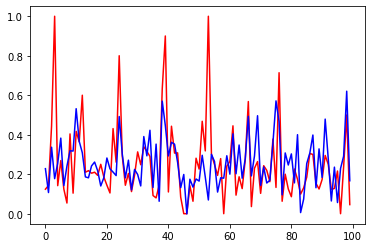

In [298]:
plt.plot(y_test,color="red")
plt.plot(y_pred,color="blue")


In [299]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [300]:
mean_squared_error(y_test,y_pred)

0.03280694389912259

In [301]:
mean_absolute_error(y_test,y_pred)

0.11557825136764499

In [302]:
r2_score(y_test,y_pred)

0.13420164066516138

In [303]:
lm.score(x,y)

0.2252476036176032